In [ ]:
!pip install sqlalchemy
!pip install pandas
!pip install pyodbc
!pip install matplotlib
!pip install seaborn
!pip install kagglehub

from sqlalchemy import create_engine
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 13.5 MB/s eta 0:00:00


In [ ]:
#Connect to the SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=CustomerReviews1;'
                      'Trusted_Connection=yes;')

#Query to get data frame from the CustomerReviews1 table
query = "SELECT * FROM CustomerReviews2"
df = pd.read_sql(query, conn)
conn.close()

In [ ]:
# Download latest version of dataset from kaggle
path = kagglehub.dataset_download("chaudharyanshul/airline-reviews")
print("Path to dataset files:", path)

100%|██████████| 1.30M/1.30M [00:00<00:00, 2.41MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/chaudharyanshul/airline-reviews/versions/1


In [ ]:
#Read the csv file and make a data frame
full_path = path + '/BA_AirlineReviews.csv'
#Move the downloaded file to current directory
!mv $full_path .

df = pd.read_csv('./BA_AirlineReviews.csv')
df

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,1.0,British Airways customer review,J Robertson,29th August 2012,False,This was a bmi Regional operated flight on a R...,NaN,Economy Class,NaN,NaN,3.0,1.0,NaN,3.0,no,NaN,2.0,NaN,NaN
3697,3697,9.0,British Airways customer review,Nick Berry,28th August 2012,False,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaN,4.0,5.0,NaN,3.0,yes,NaN,4.0,NaN,NaN
3698,3698,5.0,British Airways customer review,Avril Barclay,12th October 2011,False,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,4.0,yes,NaN,NaN,NaN,NaN
3699,3699,4.0,British Airways customer review,C Volz,11th October 2011,False,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaN,1.0,3.0,NaN,1.0,no,NaN,5.0,NaN,NaN


In [ ]:
#Explore the Data
# Renaming the 'ID' column
column_index_to_rename = 0 # Index of the 'ID' column
new_column_name = 'ID'

# Renaming the column using the 'rename' method
df.rename(columns={df.columns[column_index_to_rename]: new_column_name}, inplace=True)

print(df)                  # Displaying the DataFrame after renaming
print(df.info())           # Get info on data types and non-null counts
print(df.describe())       # Get basic statistics for numeric columns

        ID  OverallRating                              ReviewHeader  \
0        0            1.0    "Service level far worse then Ryanair"   
1        1            3.0  "do not upgrade members based on status"   
2        2            8.0             "Flight was smooth and quick"   
3        3            1.0             "Absolutely hopeless airline"   
4        4            1.0        "Customer Service is non existent"   
...    ...            ...                                       ...   
3696  3696            1.0           British Airways customer review   
3697  3697            9.0           British Airways customer review   
3698  3698            5.0           British Airways customer review   
3699  3699            4.0           British Airways customer review   
3700  3700            4.0           British Airways customer review   

                  Name            Datetime  VerifiedReview  \
0              L Keele  19th November 2023            True   
1         Austin Jones 

In [ ]:
# Print the number of null values per column
print(df.isnull().sum())

ID                          0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64


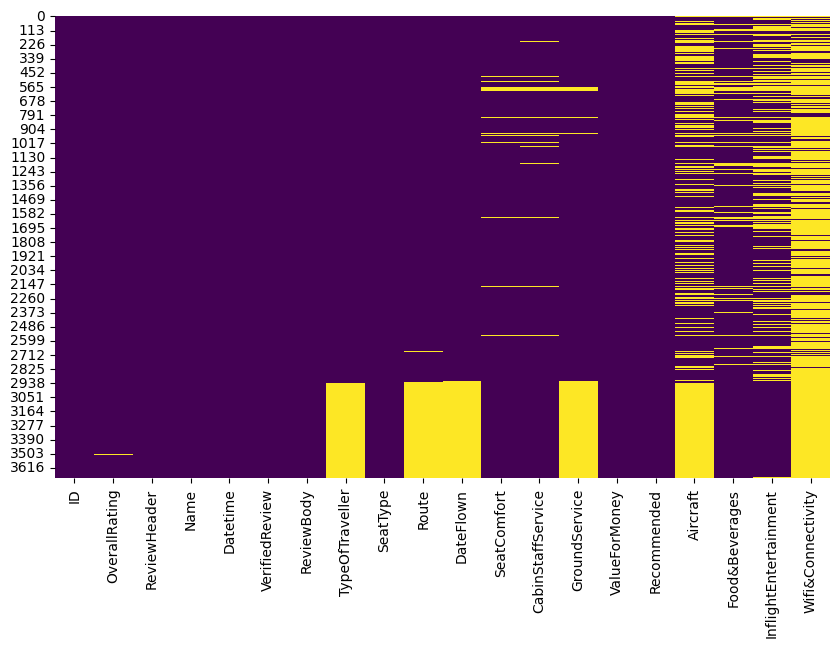

In [ ]:
# Visualize the null values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
#Drop the specified columns
df.drop(columns =
    ['ID','ReviewHeader','ReviewBody','Aircraft','Wifi&Connectivity', 'InflightEntertainment' ], inplace=True)

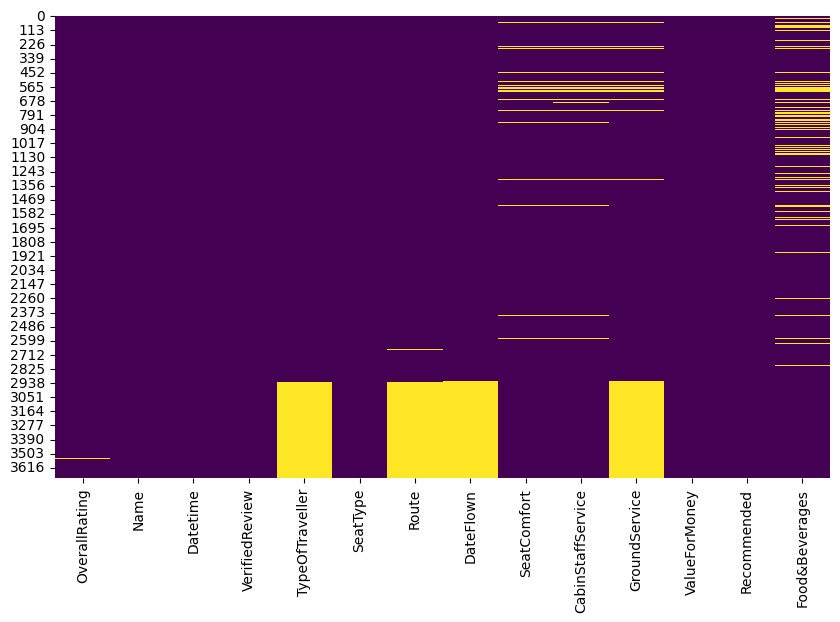

In [ ]:
# Visualize the null values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Step 2:
# Identify object type columns
object_columns = df.select_dtypes(include='object').columns



for column in df.columns:
    # Fill the null values in numerical columns by the median of each SeatType category
    if df[column].dtypes == 'float64':
       df[column] = df.groupby('SeatType')[column].transform(lambda x: x.fillna(x.median()))
    #Drop rows with null values in object type columns
    elif df[column].dtype == 'object':
         df.dropna(subset=[column], inplace=True)


# Verify the result
print(df.info())  # Get info on data types and non-null counts
print(df.isnull().sum())  # Print the number of null values per column

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, 0 to 2923
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OverallRating      2914 non-null   float64
 1   Name               2914 non-null   object 
 2   Datetime           2914 non-null   object 
 3   VerifiedReview     2914 non-null   bool   
 4   TypeOfTraveller    2914 non-null   object 
 5   SeatType           2914 non-null   object 
 6   Route              2914 non-null   object 
 7   DateFlown          2914 non-null   object 
 8   SeatComfort        2914 non-null   float64
 9   CabinStaffService  2914 non-null   float64
 10  GroundService      2914 non-null   float64
 11  ValueForMoney      2914 non-null   float64
 12  Recommended        2914 non-null   object 
 13  Food&Beverages     2914 non-null   float64
dtypes: bool(1), float64(6), object(7)
memory usage: 321.6+ KB
None
OverallRating        0
Name                 0
Datetime        

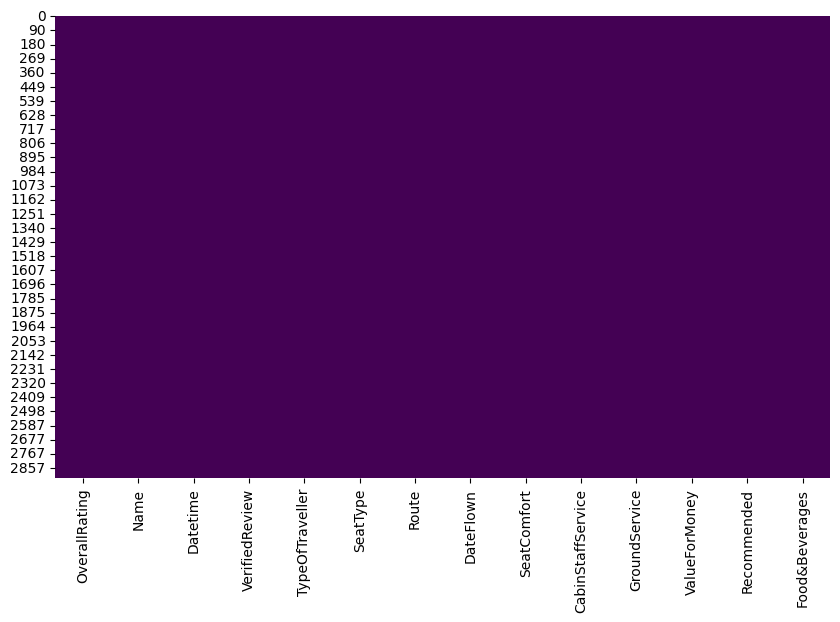

In [ ]:
# Visualize the null values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

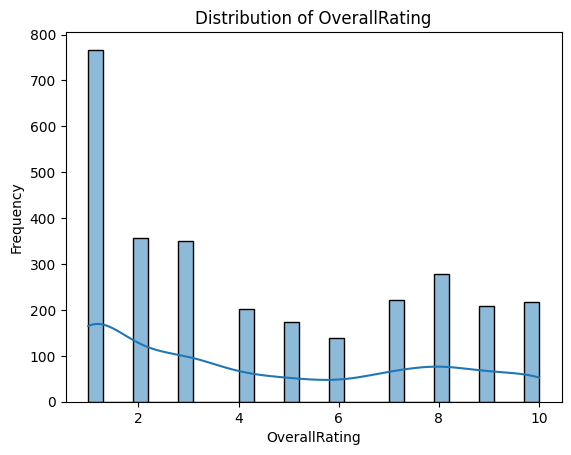

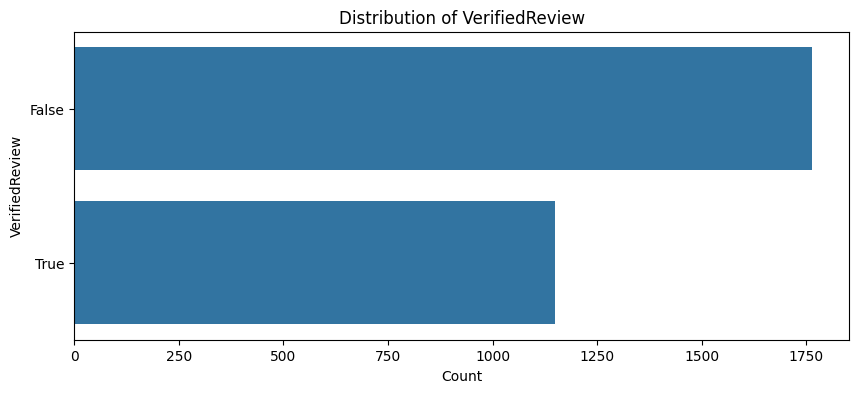

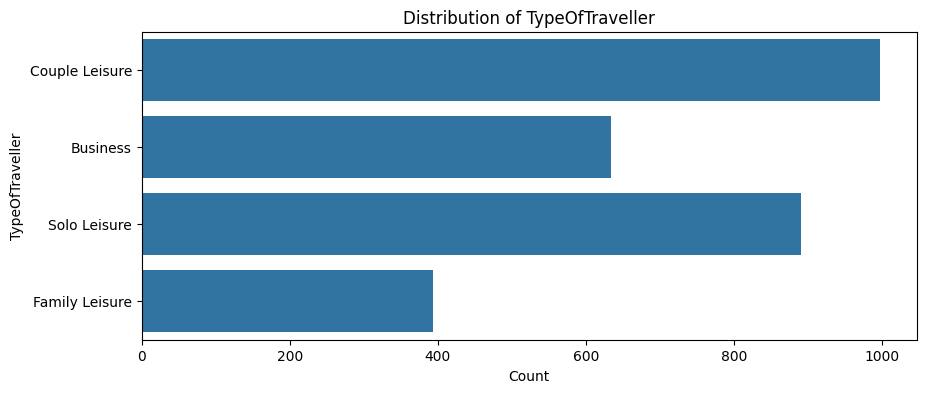

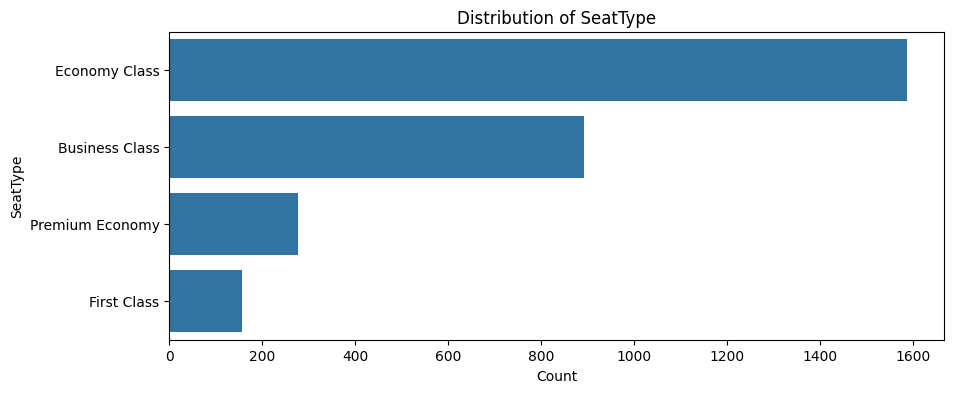

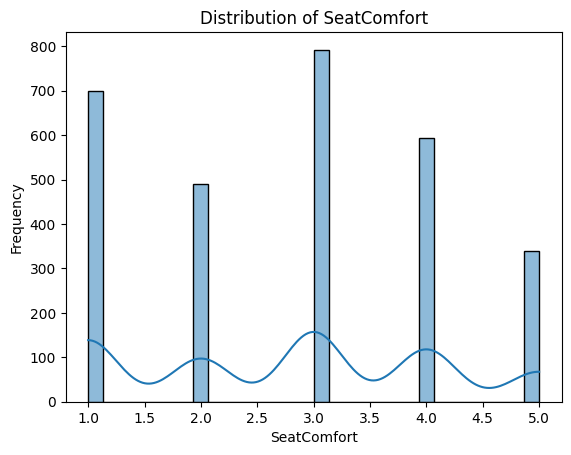

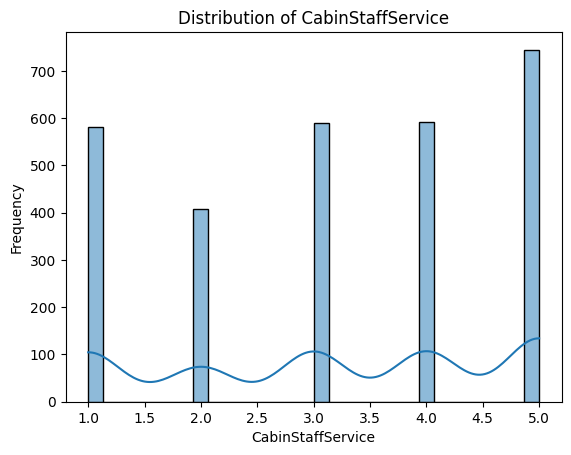

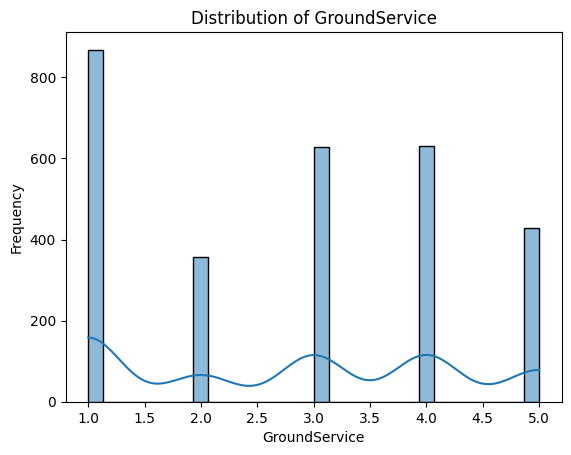

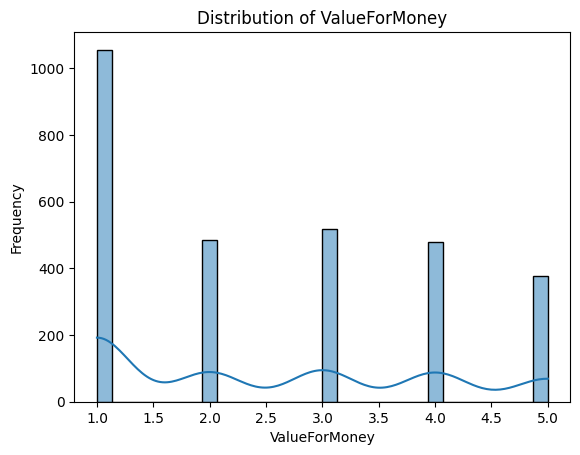

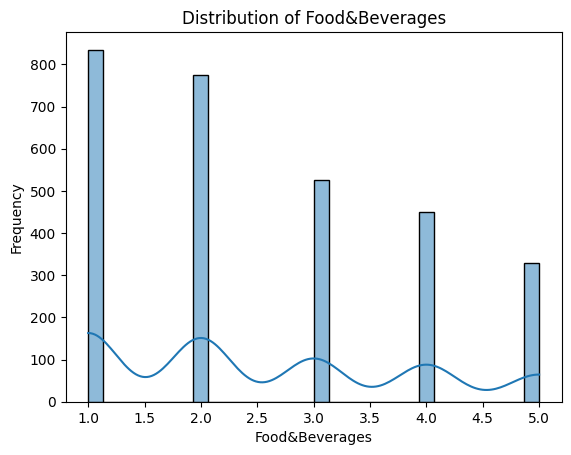

In [ ]:
# Visualize the Distribution
CatogiralColumns=['VerifiedReview','TypeOfTraveller','SeatType']
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column is numeric
    if df[column].dtype == 'float64':
        #Plot histogram
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    elif df[column].dtype == 'bool' or column in CatogiralColumns:
        #Plot count plot for categorical columns
        plt.figure(figsize=(10, 4))
        sns.countplot(y=df[column])
        plt.title(f'Distribution of {column}')
        plt.ylabel(column)
        plt.xlabel('Count')
        plt.show()

In [ ]:
df.to_csv('./CustomerReviews2.csv', index=False)

In [ ]:
#Database connection details
server = 'localhost'
database = 'CustomerReviews2'
driver = 'ODBC Driver 17 for SQL Server'

#Connection string to connect DB
connection_string = f"mssql+pyodbc://{server}/{database}?driver={driver}"
engine = create_engine(connection_string)

#Save the DataFrame to new DB and replace table if it exists
df.to_sql('CustomerReview2', engine, if_exists='replace', index=False)
print("DataFrame saved successfully to SQL Server!")

In [ ]:

from sqlalchemy import create_engine
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Connect to the SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost;'
                      'Database=CustomerFeedbackDW;'
                      'Trusted_Connection=yes;')

In [ ]:
#Read the csv file and make a data frame
data = pd.read_csv('./CustomerReview2.csv')
data

In [ ]:
# Querying data from the data warehouse
query = """
SELECT
    c.Name AS CustomerName,
    c.VerifiedReview,
    st.SeatType,
    tt.TypeOfTraveller,
    fr.SeatComfort,
    t.Date
FROM
    Fact_Review fr
JOIN
    Dim_Customer c ON fr.CustomerID = c.CustomerID
JOIN
    Dim_SeatType st ON fr.SeatTypeID = st.SeatTypeID
JOIN
    Dim_TravellerType tt ON fr.TravellerTypeID = tt.TravellerTypeID
JOIN
    Dim_Time t ON fr.DateKey = t.DateKey
"""
data = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Displaying the first few rows of the dataframe
print(data.head())

In [ ]:
# Set the style
sns.set_theme(style="whitegrid")

# Create a count plot for OverallRating
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='OverallRating', palette='viridis')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='SeatComfort', y='OverallRating', palette='coolwarm')
plt.title('Seat Comfort vs. Overall Rating')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Overall Rating')
plt.show()



plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='TravellerTypeID', hue='Recommended', palette='pastel')
plt.title('Recommendations by Traveller Type')
plt.xlabel('Traveller Type ID')
plt.ylabel('Count')
plt.legend(title='Recommended', loc='upper right')
plt.show()



# Ensure Datetime is in datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])



# Create a box plot to show the distribution of OverallRating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommended', y='OverallRating', data=data, palette='pastel')
plt.title('Overall Rating Distribution by Recommendation')
plt.xlabel('Recommended')
plt.ylabel('Overall Rating')
plt.xticks(ticks=[0, 1], labels=['Not Recommended (0)', 'Recommended (1)'])
plt.show()



# Calculate average OverallRating for each Recommendation category
average_rating = data.groupby('Recommended')['OverallRating'].mean().reset_index()

# Plotting the average OverallRating
plt.figure(figsize=(8, 5))
sns.barplot(x='Recommended', y='OverallRating', data=average_rating, palette='viridis')
plt.title('Average Overall Rating by Recommendation')
plt.xlabel('Recommended')
plt.ylabel('Average Overall Rating')
plt.xticks(ticks=[0, 1], labels=['Not Recommended (0)', 'Recommended (1)'])
plt.show()



# Summary statistics for OverallRating
print(data['OverallRating'].describe())

# Count of Recommended
recommended_counts = data['Recommended'].value_counts()
print(recommended_counts)



# Create a count plot for OverallRating colored by Recommended
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='OverallRating', hue='Recommended', palette='muted')
plt.title('Count of Recommendations by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.legend(title='Recommended', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

In [ ]:
# Check if 'SeatType' and 'SeatComfort' exist
if 'SeatType' in data.columns and 'SeatComfort' in data.columns:
    # Create a box plot for SeatComfort by SeatType
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x='SeatType', y='SeatComfort', palette='muted')
    plt.title('Seat Comfort Ratings by Seat Type')
    plt.xlabel('Seat Type')
    plt.ylabel('Seat Comfort Rating')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.ylim(0, 10)  # Adjust based on the expected rating scale
    plt.show()

    # Calculate the average seat comfort for each SeatType
    average_comfort = data.groupby('SeatType')['SeatComfort'].mean().reset_index()

    # Plotting the average seat comfort
    plt.figure(figsize=(10, 5))
    sns.barplot(x='SeatType', y='SeatComfort', data=average_comfort, palette='viridis')
    plt.title('Average Seat Comfort Rating by Seat Type')
    plt.xlabel('Seat Type')
    plt.ylabel('Average Seat Comfort Rating')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.ylim(0, 10)  # Adjust based on the expected rating scale
    plt.show()
else:
    print("One or both of the columns 'SeatType' and 'SeatComfort' are missing from the DataFrame.")


In [ ]:
plt.savefig('plot_name.png', dpi=300)  # Save with high resolution